# version 2 looks better

In [26]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Deck definitions

In [27]:
uniform_deck1 = [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 
                 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 
                 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 
                 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 
                 9, 9, 9, 9, 9]
uniform_deck2 = uniform_deck1.copy()

low_deck1 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 
             2, 2, 2, 2, 2, 2, 2, 2, 
             3, 3, 3, 3, 3, 3, 3, 
             4, 4, 4, 4, 4, 4, 
             5, 5, 5, 5, 5, 
             6, 6, 6, 6, 
             7, 7, 7, 
             8, 8, 
             9]
low_deck2 = low_deck1.copy()

high_deck1 = [9, 9, 9, 9, 9, 9, 9, 9, 9, 
              8, 8, 8, 8, 8, 8, 8, 8, 
              7, 7, 7, 7, 7, 7, 7, 
              6, 6, 6, 6, 6, 6, 
              5, 5, 5, 5, 5, 
              4, 4, 4, 4, 
              3, 3, 3, 
              2, 2, 
              1]
high_deck2 = high_deck1.copy()


# create trials

In [28]:
def create_trials():
    """
    This function generates a total of 270 trials in the following order:
    1) 45 trials from uniform deck
    2) 45 trials from low deck
    3) 45 trials from high deck
    4) 135 trials (45 uniform, 45 low, 45 high) all shuffled
    """

    def make_n_trials(deck1, deck2, deck_type, n=45):
        trials = []
        for _ in range(n):
            card1 = random.choice(deck1)
            card2 = random.choice(deck2)
            while card1 == card2:
                card2 = random.choice(deck2)
            trials.append((card1, card2, deck_type))
        return trials

    # 45 uniform
    uniform_block = make_n_trials(uniform_deck1, uniform_deck2, "uniform", 45)
    
    # 45 low
    low_block = make_n_trials(low_deck1, low_deck2, "low", 45)
    
    # 45 high
    high_block = make_n_trials(high_deck1, high_deck2, "high", 45)
    
    # 135 shuffled (45 uniform, 45 low, 45 high)
    uniform_final = make_n_trials(uniform_deck1, uniform_deck2, "uniform", 45)
    low_final = make_n_trials(low_deck1, low_deck2, "low", 45)
    high_final = make_n_trials(high_deck1, high_deck2, "high", 45)
    
    final_shuffled_block = uniform_final + low_final + high_final
    random.shuffle(final_shuffled_block)
    
    # cmbine all
    all_trials = uniform_block + low_block + high_block + final_shuffled_block
    return all_trials


# Q-learning parameters

In [29]:
q_table = {}
epsilon = 1.0           # Exploration rate
epsilon_min = 0.01      # Minimum exploration rate
epsilon_decay = 0.98
alpha = 0.01            # Learning rate
gamma = 0.9             # Discount factor
initial_reward = 10
num_episodes = 1000

reward_history = []


# helper functions

In [30]:

def get_state_key(card1, deck_type):
    # state : (card_value, deck_type_string)
    return (card1, deck_type)


def epsilon_greedy_policy(state):
    # e-greedy policy: with probability epsilon choose a random action, otherwise choose the action with the highest Q-value.
    
    if state not in q_table:
        q_table[state] = [0.0, 0.0]  
    if random.random() < epsilon:
        return random.choice([0, 1])  # explore
    else:
        return np.argmax(q_table[state])  # exploit


# training

In [31]:
for episode in range(num_episodes):
    trials = create_trials()
    total_reward = initial_reward

    for card1, card2, deck_type in trials:
        #  current state
        state = get_state_key(card1, deck_type)
        
        # choose action using epsilon-greedy policy
        action = epsilon_greedy_policy(state)

        # reward
        # action 0: card1 < card2 then +0.5 if card1 < card2, else -0.5
        # action 1: card1 > card2 then +0.5 if card1 > card2, else -0.5

        if (action == 0 and card1 < card2) or (action == 1 and card1 > card2):
            r = 0.5
        else:
            r = -0.5

        # q-Learning update
        if state not in q_table:
            q_table[state] = [0.0, 0.0]
        current_q = q_table[state][action]
        max_next_q = max(q_table[state])  
        q_table[state][action] = current_q + alpha * (r + gamma * max_next_q - current_q)

        total_reward += r

    reward_history.append(total_reward)

    # decay epsilon
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay



# e-greedy learning curve


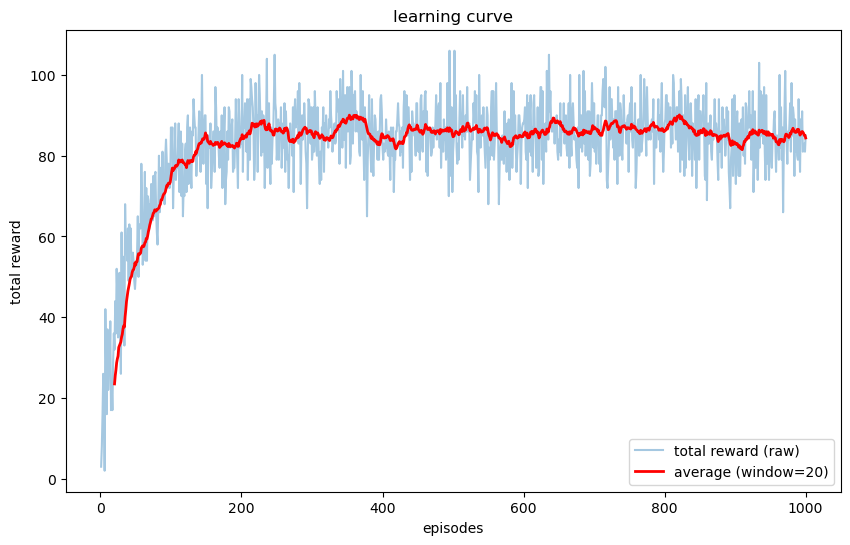

In [33]:
plt.figure(figsize=(10, 6))

plt.plot(range(1, num_episodes + 1), reward_history, label='total reward (raw)', alpha=0.4)

window_size = 20  
moving_avg = np.convolve(reward_history, np.ones(window_size) / window_size, mode='valid')


plt.plot(range(window_size, num_episodes + 1), moving_avg, 
         label=f'average (window={window_size})', color='red', linewidth=2)

plt.xlabel('episodes')
plt.ylabel('total reward')
plt.title('learning curve')
plt.legend()
plt.show()
